In [123]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [124]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [125]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [126]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [127]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data = StandardScaler().fit_transform(df_market_data)

In [128]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_market_data, columns = df_market_data.columns, index = df_market_data.index)  # Copy the crypto names from the original data # Set the coinid column as index

# Display sample data
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [129]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [130]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory 

In [131]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [132]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve to visually identify the optimal value for k", xticks=k)
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Upon visual inspection of the above plot, the best value for 'k' seems to be **3**.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [133]:
# Initialize the K-Means model using the best value for k i.e. 3
model = KMeans(n_clusters=3)

In [134]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [135]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [136]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data_scaled.copy()

In [137]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions['CryptoClusters'] = crypto_clusters

# Display sample data
df_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoClusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [138]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CryptoClusters",
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Crypto Clusters - k=3"
)

:NdOverlay   [CryptoClusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [139]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [140]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [141]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [142]:
sum(pca.explained_variance_ratio_)

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components = 0.8950316570309841 or **89.50%**.

In [143]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(market_data_pca, columns= ['PC1', 'PC2', 'PC3'], index= df_market_data_scaled.index)  # Copy the crypto names from the original data  # Set the coinid column as index

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [144]:
# Create a list with the number of k-values from 1 to 11
k2 = list(range(1, 11))

In [145]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k2:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(pca_df)
    inertia2.append(model.inertia_)

c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory 

In [146]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k2,
    "inertia": inertia2
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [147]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve to visually identify the optimal value for k", xticks=k2)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Upon visual inspection of the above plot, the best value for 'k' when using the PCA data seems to be **3**.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** **No**, both the original and the PCA data plot are almost identical.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [148]:
# Initialize the K-Means model using the best value for k i.e. 3
model = KMeans(n_clusters=3)

In [149]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Harshh\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [150]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model.predict(pca_df)
# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [151]:
# Create a copy of the DataFrame with the PCA data
df_market_data_predictions_pca = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions_pca['CryptoClusters(PCA)'] = crypto_clusters_pca

# Display sample data
df_market_data_predictions_pca.head()

,PC1,PC2,PC3,CryptoClusters(PCA)
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [152]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_predictions_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="CryptoClusters(PCA)",
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Crypto Clusters (PCA) - k=3"
)

:NdOverlay   [CryptoClusters(PCA)]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

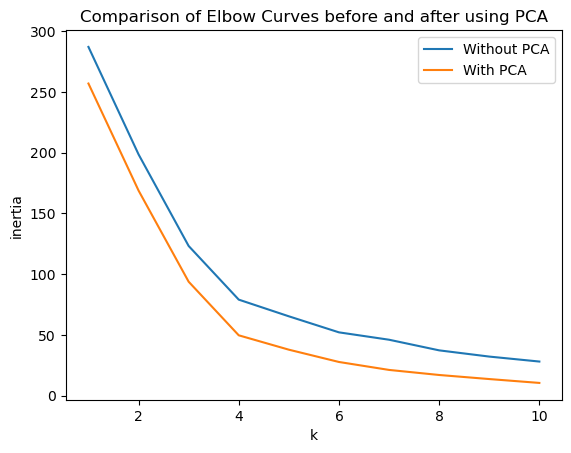

In [153]:
# Composite plot to contrast the Elbow curves
plt.plot(df_elbow['k'], df_elbow['inertia'], label= 'Without PCA')
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], label= 'With PCA')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Comparison of Elbow Curves before and after using PCA')
plt.legend()
plt.show()

In [154]:
# plt.scatter(df_market_data_predictions['price_change_percentage_24h'], df_market_data_predictions['price_change_percentage_7d'], c= df_market_data_predictions['CryptoClusters'], label= 'Without PCA')
# plt.scatter(df_market_data_predictions_pca['PC1'], df_market_data_predictions_pca['PC2'], c= df_market_data_predictions_pca['CryptoClusters(PCA)'], label= 'With PCA')
# plt.title('Comparison of Scatter Plots before and after using PCA')
# plt.legend()
# plt.show()

In [155]:
# Composite plot to contrast the clusters
df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CryptoClusters",
    width=750, height=500,
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Crypto Clusters - k=3"
) + df_market_data_predictions_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="CryptoClusters(PCA)",
    width=750, height=500,
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Crypto Clusters (PCA) - k=3"
)

:Layout
   .NdOverlay.I  :NdOverlay   [CryptoClusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [CryptoClusters(PCA)]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** \
  We clustered on all 7 features of the original data and visualized the scatter plot of those clusters wrt only 2 of the features ("price_change_percentage_24h" and "price_change_percentage_7d"). The distribution (left image) showed that the clusters aren't clearly separated.\
  Next, we optimized the data by using PCA to convert the 7 features to just 3 features ("PC1", "PC2" and "PC3"). After forming clusters on the 3 features, when we plotted them wrt to 2 of the most contributing PCA features ("PC1" and "PC2"), the distribution (right image) showed the clusters as well-separated.